# NAME OF PROJECT

#### S Sexton
#### May 5, 2020

### Table of Contents

* [1. Project Goal & Background Information](#project_goal)
    * [Section 1.1](#section_1_1)
        * [Section 1.2.1](#section_1_2_1)
* [2. Acquire Data](#acquire)
* [3. Load Libraries](#libraries)
* [4. Load Dataset](#dataset)
* [5. Change Format & Variable Type](#format)
* [6. Get Basic Statistics](#statistics)
* [6. Address Missing Variables](#missing)
* [7. Visualizations](#visualize)

In [ ]:
# NOTE:    
# must add and anchor to each title in table of contents - <a class="anchor" id="project_goal"></a>

# Github
Upload to github everyday

1. create repository
2. make public
3. initialize readme
4. upload file
5. drag and drop in file
6. commit changes

# 1. Project Goal & Background Information <a class="anchor" id="project_goal"></a>
- Create a summary of what the project goal is, information given, challenges, etc.
- Understand the problem.
- Maybe summarize the overall method being employed.

KAGGLE PROJECTS:
- Look at the description to get an idea of what you will need to do.
- Look through the discussion section to get an idea of what the questions are to be answered.
- The data section will explain what the headers mean.
- Try to understand the problems by looking at web videos, researching the web.

NON-KAGGLE PROJECTS:
- Must get a clear idea of what the question is.
- This may include interviewing who you are doing the project for to find out what they REALLY want.
- What dataset do I need to investigate this quesion. What dataset do I have? Do I need to add to the dataset?

- list useful information that contributes to the understanding of the problem

# 2. Acquire Data <a class="anchor" id="acquire"></a>

- This may not always be necessary.
- May need to scrape the web for this.
- Add more here
- clean data if necessary

# 3. Load Libraries <a class="anchor" id="libraries"></a>

#### Install Libraries that are needed and have not yet been installed
- Ensure in correct directory or will not install properly
- in juptyer: ! pip install (name of package here)

#### Load libraries needed for the project
- in juptyer: import pandas
- can use alias for easier programming: import pandas as pd

If only going to use a couple libraries from a module then import only those
from sklearn.svm import NuSVR, SVR

If using magic functions, import those

It's nice to say why you are using the library

In [ ]:
Common libraries are:

import pandas as pd # for data manipulation and analysis, imported as alias pd
import numpy as np # for working with arrays, imported as alias np
import seaborn as sns # for charting
import matplotlib.pylab as plt # for charting
import warnings 
import os # change working directory

sns.set_style('whitegrid') # sets aesthetics for seaborn charts, choose from: darkgrid, whitegrid, dark, white, and ticks
# sets plot inline
%matplotlib inline

In [ ]:
Other: 
    
from IPython.display import HTML
warnings.filterwarnings("ignore") # supresses repeated warnings from same source code
pd.set_option('max_columns', 100) # displays a maximum of 100 columns
my_pal = sns.color_palette(n_colors=10) # default color for seaborn is 6 colors, this gives 10

# 4. Load Dataset <a class="anchor" id="dataset"></a>

##### ENSURE IN CORRECT WORKING DIRECTORY

In [2]:
# get working directory
os.getcwd()

# change working directory 
os.chdir('C:\\Users\\sexto\\Downloads')

In [ ]:
# if manually downloading data, can check files in directory to ensure it is there
import os
wd = os.getcwd()
os.listdir(wd)

##### DOWNLOAD

In [ ]:
# Make code as reproducible as possible by loading data from the direct link from the web
trainUrl = "https://www.kaggle.com/c/titanic/download/GQf0y8ebHO0C4JXscPPp%2Fversions%2FXkNkvXwqPPVG0Qt3MtQT%2Ffiles%2Ftrain.csv"
df2 = pd.read_csv(trainUrl, sep=',')

# However, reading in this file caused problems. I am unsure why? It was supposed to be clean data
# Got an answer from stackoverflow from below which is tried dropping rows with errors but decided not to do this
train = pd.read_csv("https://www.kaggle.com/c/titanic/download/GQf0y8ebHO0C4JXscPPp%2Fversions%2FXkNkvXwqPPVG0Qt3MtQT%2Ffiles%2Ftrain.csv", error_bad_lines=False)

###### Size of data is important
- Look at the SIZE of the dataset(s) (usually train). Look at when not compressed.
- 4 GB is quite large. A GB is 1,000,000 KB.
- In kaggle, click on grid icon and can see the size of the dataset if click on the file.
- Otherwise, after downloading, click properties over the file name and can see the size.
- If file is very large then must read in only part of it. There is a way to break this up like the earthquake file.
- train = train.sample(1000000)

Different packages have their own way of reading data. 
- Pandas
- Dask
- Datatable
- Rapids

Apart from methods of reading data from the raw csv files, it is also common to convert the dataset into another format which uses lesser disk space, is smaller in size and/or can be read faster for subsequent reads. The file types explored in the notebook (Default csv and rest alphabetically):
- csv
- feather
- hdf5
- jay
- parquet
- pickle

Note that just reading data is not the end of the story. The final decision of which method to use should also consider the downstream tasks and processes of the data that will be required to run. 

##### PANDAS
Pandas is probably the most popular method of reading datasets and is also the default on Kaggle. It has a lot of options, flexibility and functions for reading and processing data.

One of the challenges with using pandas for reading large datasets is it's conservative nature while infering data types of the columns of a dataset often resulting in unnecessary large memory usage for the pandas dataframe. You can pre-define optimal data types of the columns (based on prior knowledge or sample inspection) and provide it explicitly while reading the dataset.

Documentation: https://pandas.pydata.org/docs/

In [ ]:
# Setting header to None ensures headers are not imported in IF you dont want them

import pandas as pd

%%time

dtypes = {
    "row_id": "int64",
    "user_id": "int32",
    "task_container_id": "int16",
    "user_answer": "int8",
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "boolean"
}

data = pd.read_csv("../input/riiid-test-answer-prediction/train.csv", dtype=dtypes)

print("Train size:", data.shape)

##### IMPORT EXCEL SHEETS WITH PANDAS

In [ ]:
# IMPORT EXCEL SHEETS WITH PANDAS
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)

# Load a sheet into a DataFrame by name of sheet
df1 = xls.parse('2004')

# Load a sheet into a DataFrame by index
df2 = xls.parse(0)

# Parse the first column of the second sheet and rename the column
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

In [ ]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

##### DASK
Dask provides a framework to scale pandas workflows natively using a parallel processing architecture. For those of you who have used Spark, you will find an uncanny similarity between the two.

Documentation: https://docs.dask.org/en/latest/

In [ ]:
import dask.dataframe as dd

dtypes = {
    "row_id": "int64",
    "user_id": "int32",
    "task_container_id": "int16",
    "user_answer": "int8",
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "boolean"
}

data = dd.read_csv("../input/riiid-test-answer-prediction/train.csv", dtype=dtypes).compute()

print("Train size:", data.shape)

##### DATATABLE
Datatable (heavily inspired by R's data.table) can read large datasets fairly quickly and is often faster than pandas. It is specifically meant for data processing of tabular datasets with emphasis on speed and support for large sized data.

Documentation: https://datatable.readthedocs.io/en/latest/index.html

In [ ]:
# datatable installation with internet
# !pip install datatable==0.11.0 > /dev/null

# datatable installation without internet
!pip install ../input/python-datatable/datatable-0.11.0-cp37-cp37m-manylinux2010_x86_64.whl > /dev/null

import datatable as dt

%%time

data = dt.fread("../input/riiid-test-answer-prediction/train.csv")

print("Train size:", data.shape)

# read and change to pandas dataframe at same time
# data = dt.fread("../input/riiid-test-answer-prediction/train.csv").to_pandas()

##### RAPIDS
Rapids is a great option to scale data processing on GPUs. With a lot of machine learning modelling moving to GPUs, Rapids enables to build end-to-end data science solutions on one or more GPUs.

Documentation: https://docs.rapids.ai/

In [ ]:
# rapids installation (make sure to turn on GPU)
import sys
!cp ../input/rapids/rapids.0.15.0 /opt/conda/envs/rapids.tar.gz
!cd /opt/conda/envs/ && tar -xzvf rapids.tar.gz > /dev/null
sys.path = ["/opt/conda/envs/rapids/lib/python3.7/site-packages"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib/python3.7"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib"] + sys.path

import cudf

%%time

data = cudf.read_csv("../input/riiid-test-answer-prediction/train.csv")

print("Train size:", data.shape)

##### RELATIONAL DATABASE
A relational database is a type of database that stores and provides access to data points that are related to one another. ... The columns of the table hold attributes of the data, and each record usually has a value for each attribute, making it easy to establish the relationships among data points.

In [ ]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Perform query and save results to DataFrame: df
# Save dataframe column names to corresponding names of table columns
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

##### SCRAPE DATA FROM WEBSITE

In [ ]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# OR
# read from website
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.text

# Print Guido's text to the shell
print(guido_text)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

##### CONVERT DATA TO ANOTHER FORMAT

In [ ]:
# reading data from csv using datatable and converting to pandas
data = dt.fread("../input/riiid-test-answer-prediction/train.csv").to_pandas()

# writing dataset as csv
data.to_csv("riiid_train.csv", index=False)

# writing dataset as hdf5
# HDF5 is a high-performance data management suite to store, manage and process large and complex data.
data.to_hdf("riiid_train.h5", "riiid_train")

# writing dataset as feather
# It is common to store data in feather (binary) format specifically for pandas. 
# It significantly improves reading speed of datasets.
data.to_feather("riiid_train.feather")

# writing dataset as parquet
# In the Hadoop ecosystem, parquet was popularly used as the primary file format for tabular datasets 
# and is now extensively used with Spark.
data.to_parquet("riiid_train.parquet")

# writing dataset as pickle
# Python objects can be stored in the form of pickle files and pandas has inbuilt functions
# to read and write dataframes as pickle objects.
data.to_pickle("riiid_train.pkl.gzip")

# writing dataset as jay
# Datatable uses .jay (binary) format which makes reading datasets blazing fast. 
dt.Frame(data).to_jay("riiid_train.jay")

##### Getting stock data from internet

In [ ]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Bank of America
BAC = data.DataReader("BAC", 'google', start, end)

# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)

# 5. CHANGE FORMAT & VARIABLE TYPE <a class="anchor" id="format"></a>

- combine data?
- convert format
- change variable type - change as needed
- get basic statistics - average, min and max and address possible outliers
- feature engineer - separate strings, create columns from other columns

##### COMBINE DATA?

People seem to combine the test and train dataset and do the manipulation on that. Then separate it afterwards?
<br>Udemy course says not to combine to do manipulation because if use something like frequent category imputation then the test set could be completely different than the train set.

In [ ]:
# Combine train and test dataset
combined_df =  pd.concat(objs=[train_df, test_df], axis=0, sort=False).reset_index(drop=True)

##### CONVERT FORMAT
- change to dataframe, dictionary, etc, whatever is needed
- this allows mathematical operations over the entire dataset

Can be in format:
    - LIST (square brackets) (eg.['hi',1,[1,2]])
    - tuple (round brackets) (eg. ( 'abcd', 786 , 2.23, 'john', 70.2  ) )
    - dictionary (curly brackets with colon) (eg. {'name': 'john'}) (d = {'key1':'item1','key2':'item2'})
    - pandas dataframe

In [ ]:
# FIRST, check format
type(df)


# SECOND, change format
# You can convert a list,numpy array, or dictionary to a Series
my_list = [10,20,30]

# convert list to series (can also use pd.Series to convert dictionaries and arrays)
pd.Series(data=my_list)

##### CHANGE VARIABLE TYPE

Setting proper variable type:
- helps with memory management
- determine what values you can assign to it and what you can do to it (including operations you can perform)
- helps to select appropriate plots for visualization

Variable can be:
- CATEGORICAL - nominal (no order eg. postcode), ordinal (can be meaningful ordered eg. student grade)
- NUMERIC - discrete (always round number eg.# family members), continuous (any value within some range eg. house cost
- DATE & TIME
- MIXED - numbers and/ or labels

Python has variable types: 
    - numbers
        - INT (eg. 5, -6) (enables mathematical operations)
        - LONG (eg. 51924361L, 0xDEFABCEC)
        - FLOAT (eg. 15.20, 32.3+e18) (enables mathematical operations)
        - COMPLEX (eg. 9.322e-36j)
    - DATETIME (enables date-based attributes and methods)
    - CATEGORY (uses less memory and runs fast)
    - BOOLEAN (eg. True or False) (enable logical and mathematical operations)
    - STRINGS (eg. HelloWorld!) (can use single or double quotes) (quotes inside quotes: " wrap lot's of quotes")

If given in dataset, look at the given description of the column names (OR search the web to determine what the variable means) to determine if the type of variable listed in "info" is appropriate or should be changed.
 Need more info here on when to change and the variable types

In [ ]:
# FIRST, determine variable types of columns with
dataset.column.dtype
# or can use
type(df['timeStamp'].iloc[0])

# SECOND, for entire dataframe (prints summary if lots of columns)
df.info()

# THIRD, if many columns, can print all column types (otherwise truncated)
# Get a Series object containing the data type objects of each column of Dataframe.
# Index of series is column name.
dataTypeSeries = train.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries.to_string())

In [ ]:
# CHANGE to appropriate format, refer to above notes

# change datatype where the brackets on left side creates or overwrites existing series
dataset['column_name']=dataset.column.astype('data_type')

# Each type of integer has a different range of storage capacity
#  Type      Capacity
#  Int16 -- (-32,768 to +32,767)
#  Int32 -- (-2,147,483,648 to +2,147,483,647)
#  Int64 -- (-9,223,372,036,854,775,808 to +9,223,372,036,854,775,807)

# Cast all columns to int32
df.astype('int32').dtypes

# Cast all columns to int64
ser.astype('int64')

# Cast col1 to int32 using a dictionary
df.astype({'col1': 'int32'}).dtypes

# Cast all columns to category
ser.astype('category')

# 6. GET BASIC STATISTICS <a class="anchor" id="statistics"></a>

##### DETERMINE # ROWS & COLUMNS IN DATASETS
This will help determine what columns may need to be added if train and test are merged.

In [ ]:
# printing size and shape 
print("Size of train- total number of elements = {}\nShape of train- rows then columns = {}".
format(train.size, train.shape))
print()
print("Size of features- total number of elements = {}\nShape of features- rows then columns = {}".
format(features.size, features.shape))

In [ ]:
# head, gives first few rows of data (n= num rows)
df.head(n=5)

# tail
df.tail()

# describe gives, count, mean, std, etc.
df.describe()

# info gives variables, types, nulls, etc.
# change the type of column is needed
df.info()

# We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features
print(cancer['DESCR'])

Make a note of any observations from above summary statistics
- are there any inappropriate values
- outliers (too high and/ or low)

##### POSSIBLE ADDITIONAL SUMMARY STATISTICS

In [ ]:
# some datasets have a description
print(boston_dataset.DESCR)

# get mean of a column that is grouped
df.groupby('Company').mean()

# can use: .std(), .min(), .max(), .count(), .transpose()

# What is the max Close price for each bank's stock throughout the time period?
# xs() function is used to get cross-section from the Series/DataFrame
# this dataframe had bank stock header then a stock info ticker
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

# What is the highest amount of OvertimePay in the dataset ?
sal['OvertimePay'].max(axis=0)

# What is the job title of JOSEPH DRISCOLL ?
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

# What is the name of highest paid person (including benefits)?
sal[sal['TotalPayBenefits']== sal['TotalPayBenefits'].max()] #['EmployeeName']

# mean for each year
s= sal.groupby('Year')
s.mean()['BasePay']

# What are the top 5 most common jobs?
sal['JobTitle'].value_counts().head(5)

# How many people have the word Chief in their job title? 
def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False

# % change for each bank
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

- print("Dates go from day", max(train['Date']), "to day", min(train['Date']), ", a total of", train['Date'].nunique(), "days")
- print("Countries with Province/State informed: ", train.loc[train['Province_State']!='None']['Country_Region'].unique())

# 7. ADRESS MISSING VARIABLES <a class="anchor" id="miss"></a>

##### FIRST, determine missing values.
All models, with the exception of naive bayes, need to have missing values removed.

##### SECOND, decide what to do with missing values. Options are:
- Complete Case Analysis - drop all missing data

##### DETERMINE MISSING VALUES

In [ ]:
# Missing data may not always be na. May have to make them all similar with:
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("property data.csv", na_values = missing_values)

In [ ]:
# Any missing values?
print(df.isnull().values.any())

# Total number of missing values
print(df.isnull().sum().sum())

In [ ]:
# List of column name and # missing
# index of series is column name
nullSeries = train.isnull().sum()
print('Total NA values:')
print(nullSeries.to_string())

In [ ]:
# Percentage of observations missing per variable

# list of columns that contain missing observations
vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]

# calculate the percentage of missing using the isnull() and mean() methods from pandas
data_na = (data[vars_with_na].isnull().mean())*100

# transform the array into a dataframe
data_na = pd.DataFrame(data_na.reset_index())

# add column names to the dataframe
data_na.columns = ['variable', 'na_percentage']

# order the dataframe according to highest to lowest percentage of na per variable
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show begin & end of data
data_na
# or use to print entire thing
print(data_na.to_string())

In [ ]:
# POSSIBLY, CREATE VISUALIZATION OF MISSING VALUES
# We can use seaborn to create a simple heatmap to see where we are missing data
# can see if the missing data is all in 1 column
# If there are a lot of columns, maybe create a new dataframe with just the columns that have missing data then chart

# If you want to modify the new dataframe at all you'll probably want to use .copy() to avoid a SettingWithCopyWarning
# eg. new = old[['A', 'C', 'D']].copy()
nullTrain = train[['date', 'weight', 'resp_1']]

# create heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

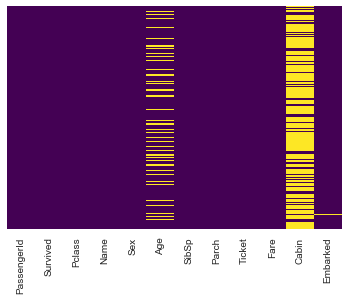

##### DECIDE WHAT TO DO WITH MISSING DATA

##### OPTION 1: COMPLETE CASE ANALYSIS - discarding observations where values in any of the variables are missing
- CCA can be applied to both categorical and numerical variables
- USE ONLY WHEN: data missing completely at random AND no more than 5% of total dataset contains missing values
    - Knowing about data collection helps decide how to deal with missing data
    - eg of NOT random: more data missing from depressed persons surveys since less motivated to answer
- Advantages: simple, no data manipulation, preserves distribution of the variables
- Disadvantages: exclude large fraction of the original dataset, excluded observations could be informative for analysis (if data not missing at random),  create a biased dataset if the complete cases differ from the original data, production model will not know how to handle missing data
- When putting models into production we need to do 1 of 2 things: either we do not score observations with missing data, or we replace the missing values by another number

In [ ]:
# find the variables with missing observations
vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

In [ ]:
# let's find out whether they are numerical or categorical
data[vars_with_na].dtypes

In [ ]:
# capture variables with no or less than 5% NA
vars_cca = [var for var in data.columns if data[var].isnull().mean() < 0.05]
vars_cca

In [ ]:
# create the complete case dataset - remove observations with na in any variable
data_cca = data[vars_cca].dropna()
print("Shape of dataset BEFORE dropping na = {}\nShape of dataset AFTER dropping na = {}".
format(data.shape, data_cca.shape))

In [ ]:
## with HISTOGRAM: let's check the distribution of a few variables before and after
# can i do this on categorical or just quantitaive?

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

In [ ]:
## with DENSITY PLOT: let's check the distribution of a few variables before and after 

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['GrLivArea'].plot.density(color='red')

# data after cca
data_cca['GrLivArea'].plot.density(color='blue')

LOOKING FOR: Is the distribution of the selected numerical variables in the original and complete case dataset is very similar? The answer should be yes which means the data is missing at random and only for a small proportion of the observations.

In [ ]:
# the following function captures the percentage of observations for each category in the original and complete case dataset
# and puts them together in a new dataframe

def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [ ]:
# run the following for each categorical cariable
# run for BsmtQual
categorical_distribution(data, data_cca, 'BsmtQual')

The values between original and cca should be very similar.

In [ ]:
# Drop column if too many missing values.
# inplace=True avoids assignment statement
# train.drop('column_name', axis='columns', inplace=True)
# dataset.dropna(subset=['col1', 'col2'], inplace=True)
# ME: think i would like a table of all the columns and missing values (get code for this)

# drops ALL rows that have at least 1 column with missing value
# inside brackets, can set Thresh: Thresh=1 means that it keeps the columns which atleast contain 1 NON NA-value.
df.dropna()

# drops ALL COLUMNS that have at least 1 row with missing value
df.dropna(axis=1)

# fill na with fill value
df.fillna(value='FILL VALUE')

# fill na with mean
df['A'].fillna(value=df['A'].mean())

# When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing 
# a value in that column, it often makes sense to remove those rows from the dataset.

### CATEGORIES
For categories, look at the NUMBER of different values AND the OCCURENCE of each value:
- CARDINALITY = within a column of a dataframe, the NUMBER of different values
    - eg. gender column is low cardinality because it just has male & female
    - eg. postal code column can be high cardinality because it can have many different postal codes
- RARE LABELS = within a column of a dataframe, a rare value is one that doesn't occur very often
    - eg.  gender column may have a rare label if female shows up only once while male shows up the other 99 times

##### CARDINALITY

The number of different labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality.

High cardinality may pose the following problems:
- Variables with too many labels tend to dominate over those with only a few labels, particularly in Tree based algorithms.
- A big number of labels within a variable may introduce noise with little, if any, information, therefore making machine learning models prone to over-fit.
- Some of the labels may only be present in the training data set, but not in the test set which causes overfitting to train set. Or vice versa with labels only in the test set which cause machine learning algorithms unable to perform a calculation over the new (unseen) observation.

Can reduce through feature engineering.

In [ ]:
# Display cardinality for CATEGORICAL variables - this is the number different labels
print('Number of categories in the variable Name: {}'.format(
    len(data.name.unique())))
print('Number of categories in the variable Gender: {}'.format(
    len(data.sex.unique())))
print('Total number of passengers in the Titanic: {}'.format(len(data)))

# In this case, the variable sex contains only 2 categories while name contains a huge number of different labels (high cardinality).

In [ ]:
# Can reduce cardinality through feature engineering
# As an example, the cabin variable consists of a letter then number.
# The first letter indicates the deck on which the cabin was located so that can be extracted to reduce # of variables.
# let's capture the first letter of Cabin
data['Cabin_reduced'] = data['cabin'].astype(str).str[0]
data[['cabin', 'cabin_reduced']].head()

In [ ]:
# Can determine labels present only in the training set for Cabin_reduced
unique_to_train_set = [
    x for x in X_train['Cabin_reduced'].unique()
    if x not in X_test['Cabin_reduced'].unique()
]
len(unique_to_train_set)

# Can determine labels present only in the test set for Cabin
unique_to_test_set = [
    x for x in X_test['Cabin_reduced'].unique()
    if x not in X_train['Cabin_reduced'].unique()
]
len(unique_to_test_set)

May introduce missing variables in the test set when use feature engineering techniques from train set. This is because the variables may not be present in both test and train sets.

##### RARE LABELS
Categorical variables often contain a few dominant labels and a large number of labels that appear only seldom (OR rare labels).

Problems with rare labels:
- Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.
- A big number of infrequent labels adds noise, with little information, therefore causing over-fitting.
- Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.
- Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it.

**Note** Sometimes rare values, are indeed important. For example, if we are building a model to predict fraudulent loan applications, which are by nature rare, then a rare value in a certain variable, may be indeed very predictive. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we would choose not to ignore it.

Can reduce through feature engineering.

In [ ]:
# let's look at the different number of labels
# in each variable (cardinality)

# these are the loaded categorical variables
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('variable: ', col, ' number of labels: ', data[col].nunique())

print('total houses: ', len(data))

In [ ]:
# let's plot how frequently each label
# appears in the dataset

# in other words, the percentage of houses in the data
# with each label

total_houses = len(data)

# for each categorical variable
for col in cat_cols:

    # count the number of houses per category
    # and divide by total houses

    # aka percentage of houses per category

    temp_df = pd.Series(data[col].value_counts() / total_houses)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

For each of the categorical variables, some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or **Rare Values** and could cause over-fitting.

Determine if there is a way to group values based on another column. For example, in the following code, see if all the rare values locations are in expensive neighbourhoods then they can be grouped together. 

In [ ]:
# the following function calculates:
# 1) the percentage of houses per category
# 2) the mean SalePrice per category

def calculate_mean_target_per_category(df, var):

    # total number of houses
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [ ]:
# now we use the function for the variable 'Neighborhood'
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
temp_df

In [ ]:
# Create a function to plot the category frequency and mean SalePrice.
# Helps visualise the relationship between the target and the labels of the  categorical variable

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()
    
plot_categories(temp_df, 'Neighborhood')

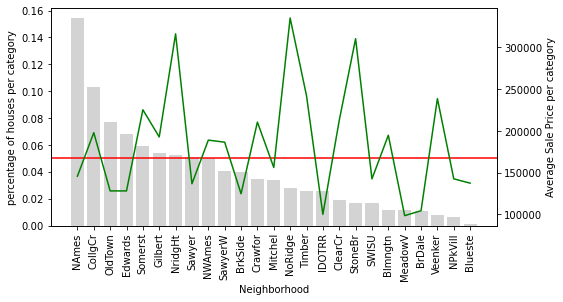

The red line is the 5% line. Categories under this are rare. For these rare categories, there doesn't seem to be a correlation of ave sale price to the neighbourhood. Thus, average sale price cannot be used to group them together. Try another variable instead of average sale price per category.

One common way of working with rare or infrequent values, is to group them under an umbrella category called 'Rare' or 'Other'. In this way, we are able to understand the "collective" effect of the infrequent labels on the target. 

In [ ]:
# I will replace all the labels that appear in less than 5%
# of the houses by the label 'rare'


def group_rare_labels(df, var):
    total_houses = len(df)
    temp_df = pd.Series(df[var].value_counts() / total_houses) # first I calculate the % of houses for each category 

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses
    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    tmp = df[var].map(grouping_dict) # now I replace the rare categories
    return tmp

# group rare labels in Neighborhood
data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')
data[['Neighborhood', 'Neighborhood_grouped']].head(10)

In [ ]:
# let's group and plot the remaining categorical variables

for col in cat_cols[1:]:
    data[col+'_grouped'] = group_rare_labels(data, col) # re using the functions I created
    temp_df = calculate_mean_target_per_category(data, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')


determine correlation between variables with heatmap?
linear relationship between variable & target, multivariate normality, little or no co-linearity (use heatmap to assess)
homoscedasticity

In [ ]:
# Determines any duplicates based on all columns
duplicateRowsDF = combined_df[combined_df.duplicated(keep='first')]
duplicateRowsDF

##### OUTLIERS
An outlier is a data point which is significantly different from the remaining data.


###### Should outliers be removed?

Depending on the context, outliers either deserve special attention or should be completely ignored. Take the example of revenue forecasting: if unusual spikes of revenue are observed, it's probably a good idea to pay extra attention to them and figure out what caused the spike. In the same way, an unusual transaction on a credit card is usually a sign of fraudulent activity, which is what the credit card issuer wants to prevent. So in instances like these, it is useful to look for and investigate further outlier values.

If outliers are however, introduced due to mechanical error, measurement error or anything else that can't be generalised, it is a good idea to remove these outliers before feeding the data to the modeling algorithm. Why? Because some algorithms are sensitive to outliers. 


###### Which machine learning models are sensitive to outliers?

Some machine learning models are more sensitive to outliers than others. For instance, AdaBoost may treat outliers as "hard" cases and put tremendous weights on outliers, therefore producing a model with bad generalisation.

Linear models, in particular Linear Regression, can be also sensitive to outliers.

Decision trees tend to ignore the presence of outliers when creating the branches of their trees. Typically, trees make decisions by asking if variable x >= a certain value, and therefore the outlier will fall on each side of the branch, but it will be treated equally than the remaining values, regardless of its magnitude.

A recent research article suggests that Neural Networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high. I would argue that if the number of outliers is high (>15% as suggested in the article), then they are no longer outliers, and rather a fair representation of that variable. A link to this article can be found in the "Additional reading resources" lecture within this section of the course.


###### How can outliers be identified?

Outlier analysis and anomaly detection are a huge field of research devoted to optimise methods and create new algorithms to reliably identify outliers. There are a huge number of ways optimised to detect outliers in different situations.

Here, however, I will focus on identifying those outliers introduced by mechanical or measurement error. Those outliers that are indeed a rare case in the population, and that could be ignored. 


###### Extreme Value Analysis

The most basic form of outlier detection is **Extreme Value Analysis** of 1-dimensional data. The key for this method is to determine the statistical tails of the underlying distribution of the variable, and then find the values that sit at the very end of the tails.

If the the variable is Normally distributed (Gaussian), then the values that lie outside the mean plus or minus 3 times the standard deviation of the variable are considered outliers.

- outliers = mean +/- 3* std


If the variable is skewed distributed, a general approach is to calculate the quantiles, and then the inter-quantile range (IQR), as follows:

- IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

- Upper boundary = 75th quantile + (IQR * 3)

- Lower boundary = 25th quantile - (IQR * 3)

###### Identify variable distribution

In Normally distributed variables, outliers are those values that lie beyond the mean plus or minus 3 times the standard deviation. If the variables are skewed however, we find outliers using the inter-quantile range. In order to decide which method to utilise to detect outliers, we first need to know the distribution of the variable.

We can use histograms and Q-Q plots to determine if the variable is normally distributed. We can also use boxplots to directly visualise the outliers. Boxplots are a standard way of displaying the distribution of a variable utilising the first quartile, the median, the third quartile and the whiskers.

Looking at a boxplot, you can easily identify:

- The median, indicated by the line within the box.
- The inter-quantile range (IQR), the box itself.
- The quantiles, 25th (Q1) is the lower and 75th (Q3) the upper end of the box.
- The wiskers, which extend to: 
  -- top whisker: Q3 + 1.5 x IQR
  -- bottom whisker: Q1 -1.5 x IQR

Any value sitting outside the whiskers is considered an outlier. Let's look at the examples below.

In [ ]:
# function to create histogram, Q-Q plot and
# boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [ ]:
# let's start with the variable RM from the boston house dataset.
# Then can check other variables.
# RM is the average number of rooms per dwelling

diagnostic_plots(boston, 'RM')

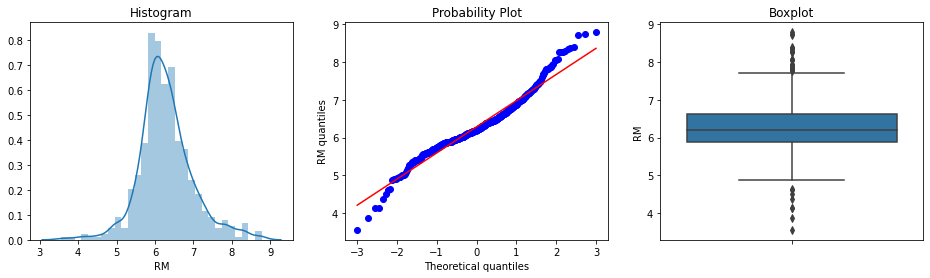

From the histogram and the Q-Q plot, we see that the variable rm approximates a Gaussian distribution quite well. In the boxplot, we see that the variable could have outliers, as there are many dots sitting outside the whiskers, at both tails of the distribution.

###### Outlier detection for Normally distributed variables

In [ ]:
# function to find upper and lower boundaries
# for normally distributed variables


def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [ ]:
# calculate boundaries for RM
upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.392485817597748, 4.176782957105809)

From the above we conclude that values bigger than 8.4 or smaller than 4.2 occur very rarely for the variable RM. Therefore, we can consider them outliers.

In [ ]:
# inspect the number and percentage of outliers for RM

print('total number of houses: {}'.format(len(boston)))

print('houses with more than 8.4 rooms (right end outliers): {}'.format(
    len(boston[boston['RM'] > upper_boundary])))

print('houses with less than 4.2 rooms (left end outliers: {}'.format(
    len(boston[boston['RM'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(boston[boston['RM'] > upper_boundary]) / len(boston)))

print('% left end outliers: {}'.format(
    len(boston[boston['RM'] < lower_boundary]) / len(boston)))

###### Outlier detection for skewed variables

In [ ]:
# function to find upper and lower boundaries
# for skewed distributed variables


def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
upper_boundary, lower_boundary

In [ ]:
# lets look at the number and percentage of outliers
# for LSTAT

print('total houses: {}'.format(len(boston)))

print('houses with LSTAT bigger than 32: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])))
print()
print('% houses with LSTAT bigger than 32: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])/len(boston)))

total houses: 506
houses with LSTAT bigger than 32: 7

% houses with LSTAT bigger than 32: 0.01383399209486166

The upper boundary shows a value of ~32. The lower boundary is negative, however the variable LSTAT does not take negative values. So to calculate the outliers for LSTAT we only use the upper boundary. This coincides with what we observed in the boxplot earlier in the notebook. Outliers sit only at the right tail of LSTAT's distribution.

We observe 7 houses, 1.3 % of the dataset, with extremely high values for LSTAT.

In [ ]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 3, now I am looking for extremely high values

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
upper_boundary, lower_boundary

##### FEATURE ENGINEERING

In [ ]:
# PUT 2 DATAFRAMES TOGETHER

# Concatenation 
# basically glues together DataFrames
# Keep in mind that dimensions should match along the axis you are concatenating on
# You can use pd.concat and pass in a list of DataFrames to concatenate together
pd.concat([df1,df2,df3])

# Merging
# The merge function allows you to merge DataFrames together using a similar logic as merging SQL Tables together
pd.merge(left, right, how='outer', on=['key1', 'key2'])

# Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result
left.join(right, how='outer')



In [ ]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [ ]:
# TIME STAMPS for date/ time columns
# Use pd.to_datetime to convert the column from strings to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# create new columns
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

# Notice how the Day of Week is an integer 0-6. 
# Use the .map() with this dictionary to map the actual string names to the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [ ]:
# In the titles column there are "Reasons/Departments" specified before the title code. Separate it out (EMS: BACK PAINS/INJURY)
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])


# 6. Visualizations <a class="anchor" id="visualize"></a>

- Need to learn what kind of chart to use, the colors, probabily or number,


##### Sample
- Do the problem on a small sample of data to ensure the results are as expected and then apply to the larger set. Can do visualizations in excel if it helps.
- Will be experimenting with techniques, etc. and not all of these will produce the intended result but trying things is the key to getting the desired technique.

- I personally don't believe in charting data for the sake of charting data. I see people just charting the data but it doesn't serve to help explain any of the questions.
- Bar charts are used when:
- Heat maps are used when: a graphical representation of data in which data values are represented as colors.
display numeric data (eg. region on y axis and each product subcategory on x axis)

In [ ]:
# MULTIPLE PLOTS ON SAME CANVAS
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

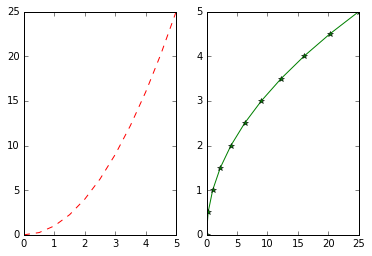

In [ ]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

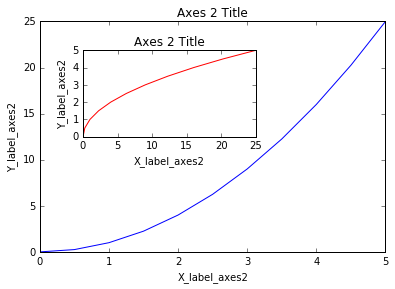

In [ ]:
# distplot
# The distplot shows the distribution of a univariate set of observations.
sns.distplot(tips['total_bill'],kde=False,bins=30)

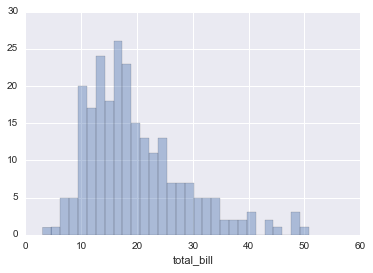

In [ ]:
# jointplot
# jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what kind parameter to compare with:
# “scatter”, “reg”, “resid”, “kde”, “hex”
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

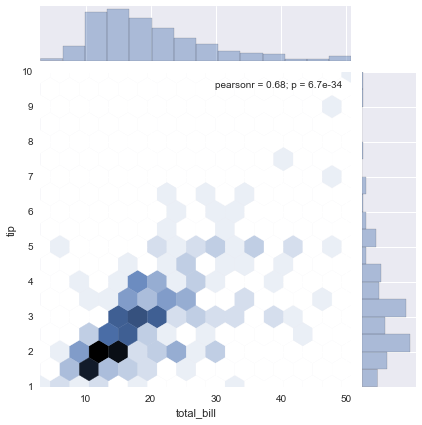

In [ ]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

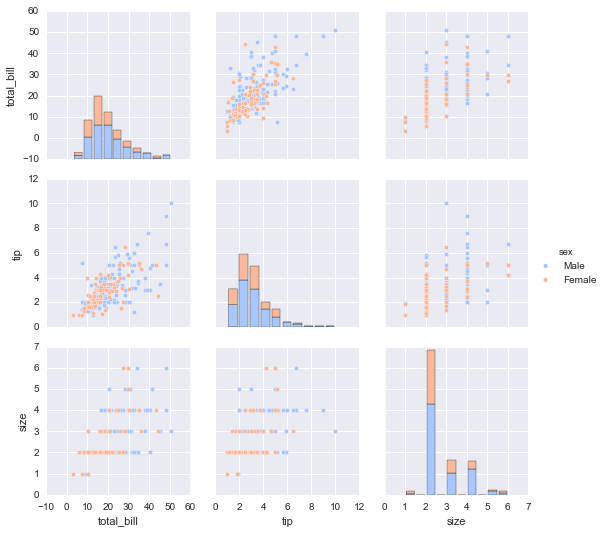

In [ ]:
# PairGrid
# Pairgrid is a subplot grid for plotting pairwise relationships in a dataset# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

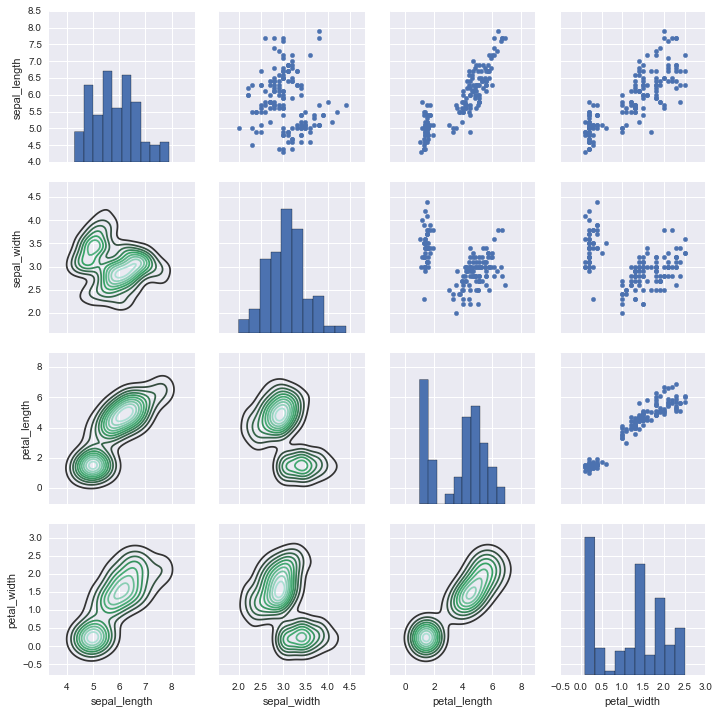

In [ ]:
sns.pairplot(iris,hue='species',palette='rainbow')

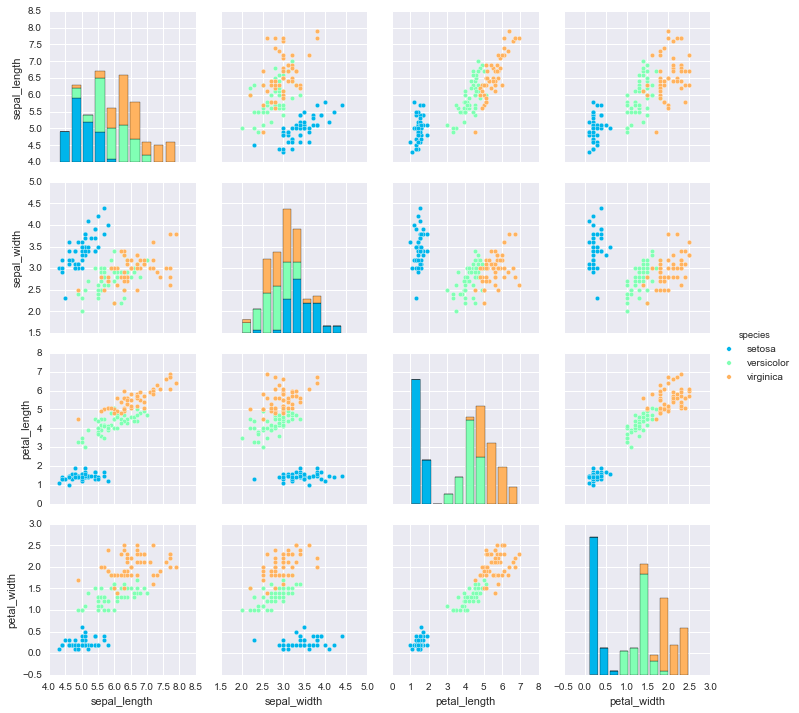

In [ ]:
# Facet Grid
# FacetGrid is the general way to create grids of plots based off of a feature
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

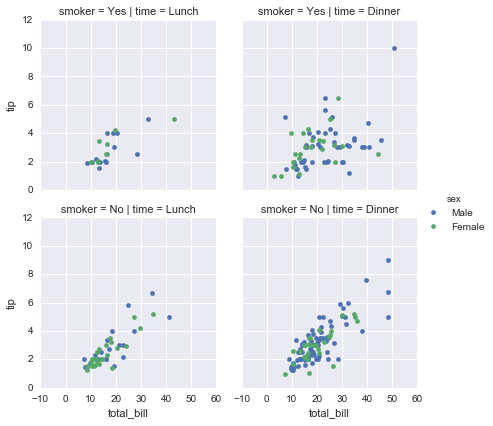

In [ ]:
# JointGrid
# JointGrid is the general version for jointplot() type grids
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

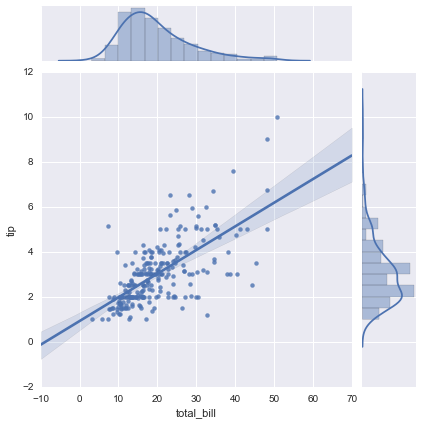

In [ ]:
# kdeplot AND rug plots
# kdeplots are Kernel Density Estimation plots. 
# These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. 
# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

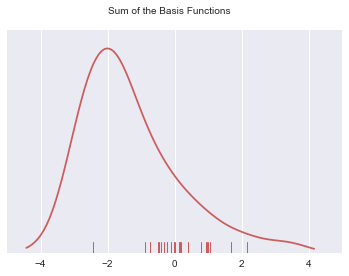

In [ ]:
# barplot
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

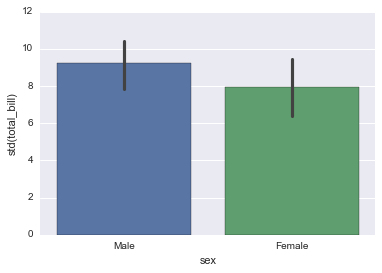

In [ ]:
# countplot
sns.countplot(x='sex',data=tips)

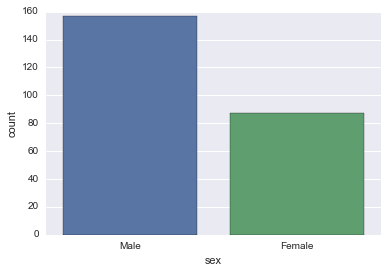

In [ ]:
# boxplot and violinplot
# boxplots and violinplots are used to shown the distribution of categorical data
# A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons 
# between variables or across levels of a categorical variable. 
# The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, 
# except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

# 
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

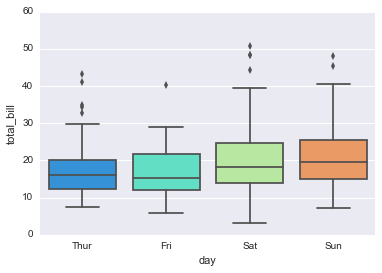

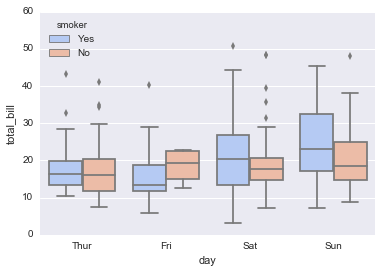

In [ ]:
# violinplot
# A violin plot plays a similar role as a box and whisker plot. 
# It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that 
# those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, 
# the violin plot features a kernel density estimation of the underlying distribution.
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

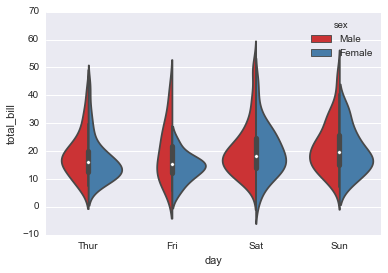

In [ ]:
# stripplot and swarmplot
# The stripplot will draw a scatterplot where one variable is categorical.
# The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap.
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

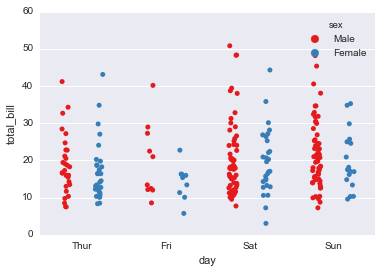

In [ ]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

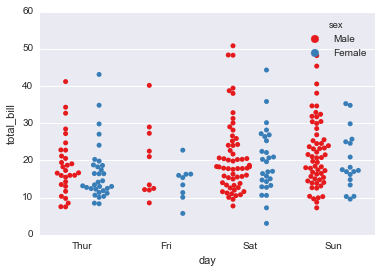

In [ ]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

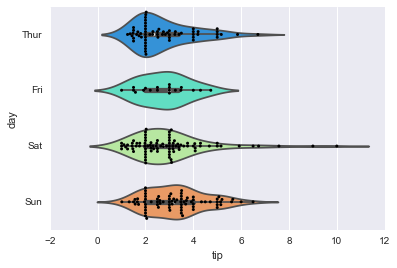

In [ ]:
# factorplot
# factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

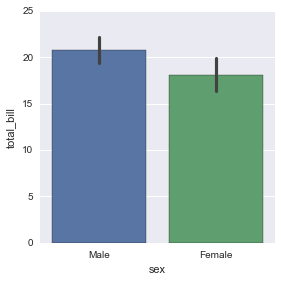

In [ ]:
# clustermap
# The clustermap uses hierarchal clustering to produce a clustered version of the heatmap
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

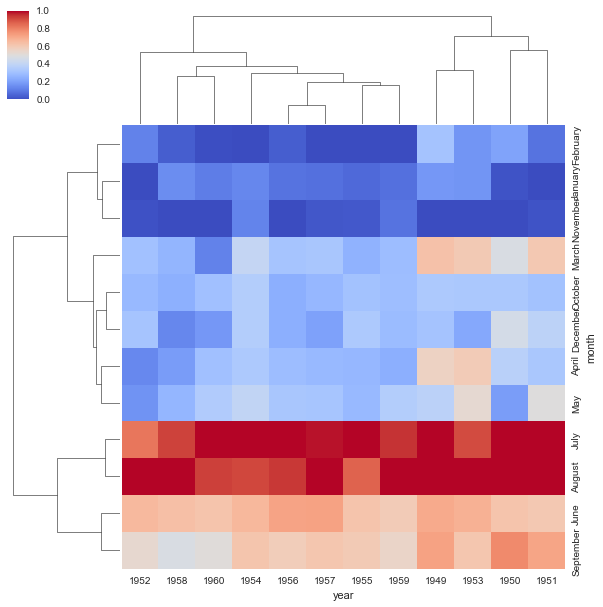

In [ ]:
# lmplot allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, 
# as well as coloring the hue based off of features
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

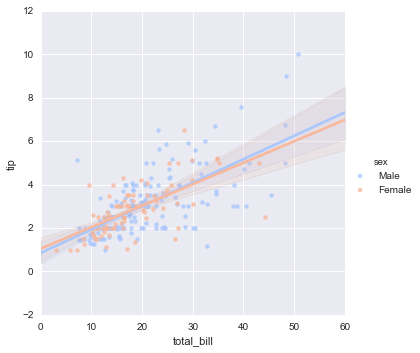

In [ ]:
# lmplot kwargs get passed through to regplot which is a more general form of lmplot()
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100}

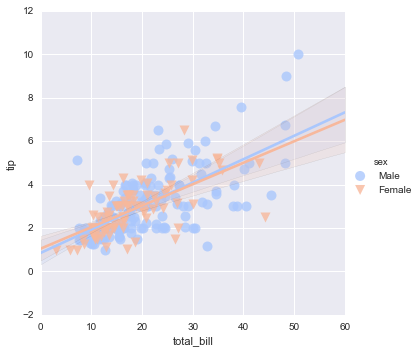

In [ ]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

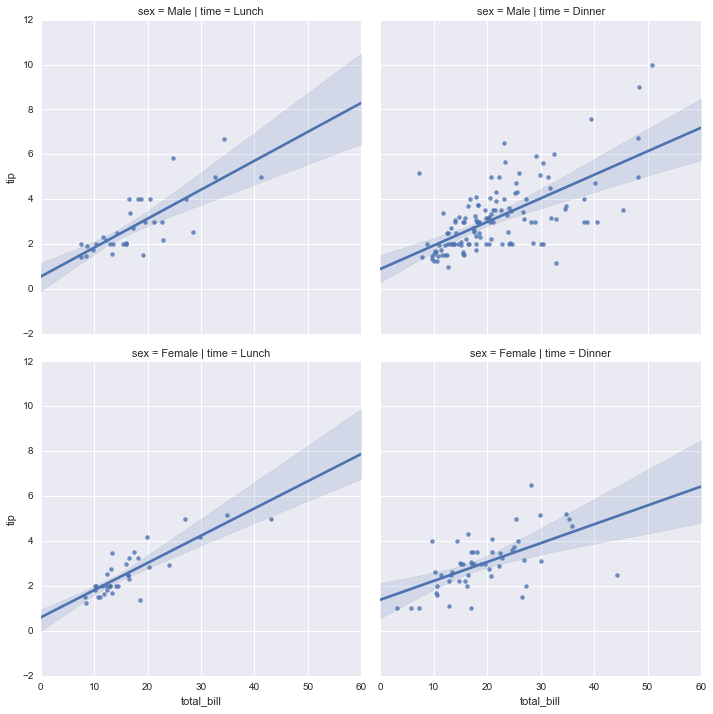

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

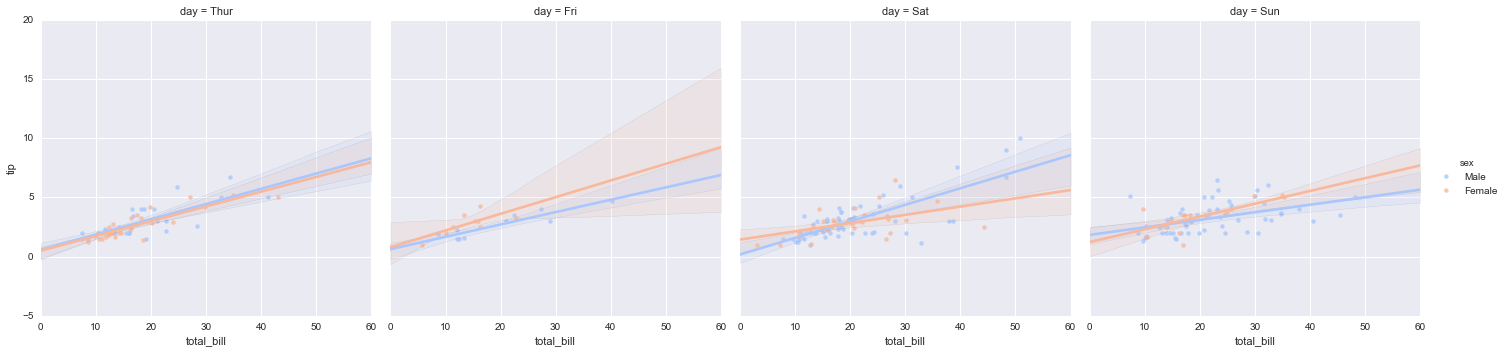

#### Pandas Plot Types

There are several plot types built-in to pandas, most of them statistical plots by nature:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

You can also just call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','barh', etc..)
___

#### Plotly and Cufflinks

* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

In [ ]:
# Choropleth Maps
data = dict(type='choropleth',
            colorscale = 'Viridis',
            reversescale = True,
            locations = usdf['State Abv'],
            z = usdf['Voting-Age Population (VAP)'],
            locationmode = 'USA-states',
            text = usdf['State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Voting-Age Population (VAP)"}
            ) 

layout = dict(title = '2012 General Election Voting Data',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

choromap = go.Figure(data = [data],layout = layout)
plot(choromap,validate=False)

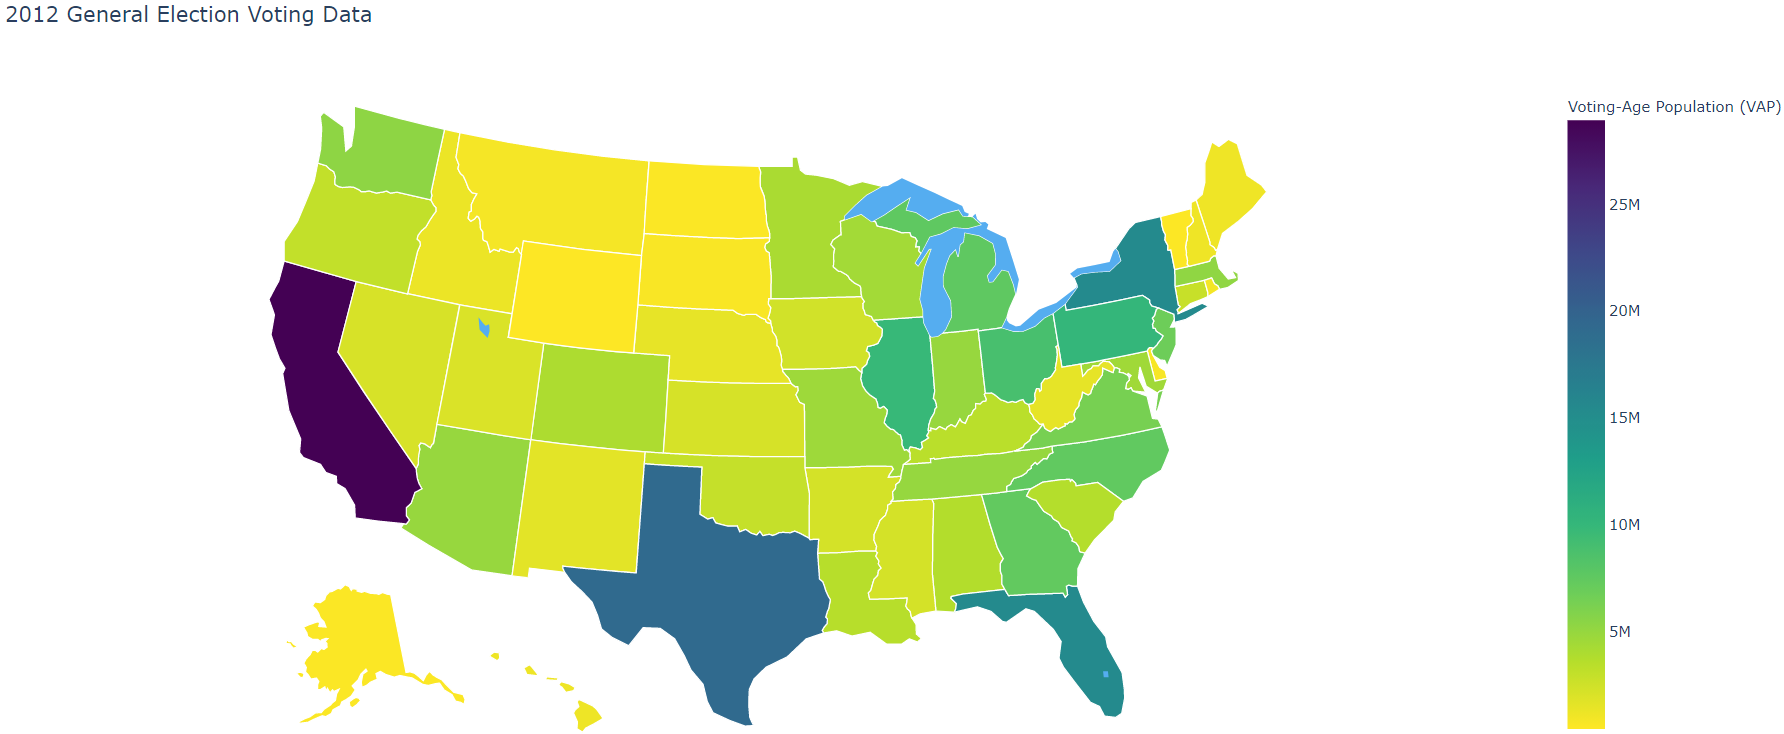

In [ ]:
# Get a count of how many instances for 0,1,2,3 in a particular group (accuracy_group in this case)
# game_session is 
train_labels.groupby('accuracy_group')['game_session'].count() \
    .plot(kind='barh', figsize=(15, 5), title='Target (accuracy group)')
plt.show()

# Get a count in sns that shows the % value it represents overall
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(y='accuracy_group',  data=train_labels)

total = len(train_labels['accuracy_group'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()




In [ ]:
# Hypothesis - Rich people survive at higher rate than poor people


In [ ]:
# In order to do random forest, 
# Convert to integers
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

# Determine Variables To Keep
- if use cross validation, must use it to narrow down the variables; NOT just randomly pick
- 5 methods of building models: all-in, backward elimination, forward selection, bidirectional elimination, score comparison
- All-in use when know they are the true predictors OR you have to use all OR preparing for backward elimination
- Backward elimination. 1. select significance level to stay in the model (eg 5%); 2. fit model with all predictors; 3. Remove the predictor with highest variable IF it is above the significance level; 4. Fit the model without this variable; 5. Repeat until predictor with highest p value is below significance.
- Forward selection. 1. select significance level for model; 2. fit all simple regression models and choose model with lowest p value; 3. Keep this variable and fit all possible models with one extra predictor added to the one(s) you already have; 4. Consider the predictor with the lowest p-value. If above significance, redo step 3; 5. stop when highest predictor is below significance level
- Bidirectional elimination. 1. select significance level to stay in model; 2. perform forward selection (new variable must have p<significance to enter); 3. perform all step of backward elimination (old variable must have p<significance to stay); 4. stop when no new variable to enter or add
- All possible models/ score comparision. 1. select a criterion of goodness of fit (eg. Akakie criterion); 2. construct all possible regression models; 3. select one with best criterion; 4. model is done
- Exceptions: Even though the p-value may be above the signifance level, if it is only marginally above, then look at adjusted R squared of the entire model to see if should keep the variable. If R squared goes up, model is a better fit so keep the variable that is slightly above the significance level.
- When referring to the coefficients, ensure referring to units properly (whether dollars, km, etc.). Can compare if on same scale.
- Coefficients for each variable change as change the variables in the model.

- Best to understand the variables because if just put all the variables in, there is a chance that it may show significance in formula.
- for example, things that are not significant may be row number, surname (but may be indicator of something else)

TRANSFORM VARIABLES
- Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.
- change transform by scale, square root of variable, apply power to variable, log of variable like 10 (when greater than zero)
- can add 1 to variable or split variable into 2
- try it out and see if improves model
- want to remove the tranformed variable from the model to avoid correleated varaibles
- divide one variable by another OR multiply one variable by another eg wealth = balance/age
- if create a new variable, remove correlated variables
- determine in multicolinearity (which don't want), gretl does automatically, unsure how otherwise. Take suspected colinearity out of the model and the variable becomes significant then likely was colinearity.
- can transform the new variables as well
- create a correlation matrix to determine correlations of variables where 1 is perfectly correlated and want to avoid this. Avoid over 0.7, correct. 0.5 to 0.3, look into it. Below 0.3 is low correlation. Correlation is bad because it can't find the correct correlation for the variables.
- should not just base on accuracy rate since can be accuracy paradox where abandonment of one model increases accuracy rate
- cumulative accuracy profile can plot models against each other so can see how much gain get from one over the other. Diagonal line at 45 degrees is the random model. If model is under the curve, very bad model.
- to get accuracy ratio, look at % on y axis when take 50% on x axis. If value on y less than 60% than bad. If y value between 60% & 70% then poor. If y value between 70% & 80% then good. If above then very good. If between 90% & 100% then may be too good.



HOW DO I DETERMINE SIGNIFICANCE LEVEL
explain dummy variables to replace a variable (use one less when fitting the model)
good way to understand is visualize

## NA or missing values
- Remove -  In the case of a very large dataset with very few missing values, this approach could potentially work really well. However, if the missing values are in cases that are also otherwise statistically distinct, this method may seriously skew the predictive model for which this data is used. 
- REPLACE missing values with the mean/median value of the feature in which they occur - For imbalanced data, the median may be more appropriate, while for symmetrical and more normally distributed data, the mean could be a better choice.
- Label encode NAs as another level of a categorical variable - works with tree-based models and other models if the feature can be numerically transformed (one-hot encoding, frequency encoding, etc.). This technique does not work well with logistic regression.
- Run predictive models that impute the missing data. This should be done in conjunction with some kind of cross-validation scheme in order to avoid leakage. This can be very effective and can help with the final model.
- Use the number of missing values in a given row to create a new engineered feature.

Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

In [ ]:
# fill in missing age data instead of just dropping the missing age data rows. 
# One way to do this is by filling in the mean age of all the passengers (imputation)
# However we can be smarter about this and check the average age by passenger class
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

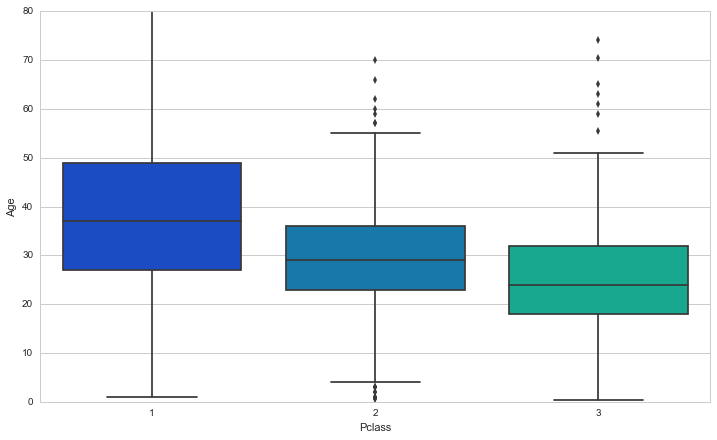

In [ ]:
# use these average age values to impute based on Pclass for Age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

# Normalization

In [ ]:
# Are they CATEGORICAL (can be nominal like m/f or ordinal like ordered as in small/med/large) 
# OR NUMERIC (can be discrete like whole numbers or continous like fractions)

Generally, it isn't good to customize the data. However, if there is not a lot of training data such as was the case with the earthquake competition where there were only 16 training earthquakes, it may be necessary to remove some data in order to ensure the training model is not skewed.
In the case of the earthquake file, 

TEST AND TRAIN
- break up data into test and train sets

# Feature Engineering

Earthquake competition (given 16 earthquakes as train and small segments as test):
- winner: the signal had a certain time-trend that caused some issues specifically on mean and quantile based features. To partly overcome this, we added a constant noise to each 150k segment (both in train and test) by calculating np.random.normal(0, 0.5, 150_000). Additionally, after noise addition, we subtracted the median of the segment.
- i did a bar chart of the most common values. The values were all very small. So i subtracted out a range of the small values.
- One of our best final LGB model only used four features: (i) number of peaks of at least support 2 on the denoised signal, (ii) 20% percentile on std of rolling window of size 50, (iii) 4th and (iv) 18th Mel-frequency cepstral coefficients mean. We sometimes used a few more features (like for the NN, see below) but they are usually very similar. Those 4 are decently uncorrelated between themselves, and add good diversity. For each feature we always only considered it if it has a p-value >0.05 on a KS statistic of train vs test.

IDEAS
- I like the idea of dropping the lowest and highest values
- taking average, max,


In [ ]:
# Some variables act as surogates for the other . eg ldl vs obesity

# Model Development

Many times, people COMBINE SEVERAL MODELS together to get final model.

In [ ]:
# Taking the MODE (OR VALUE THAT APPEARS MOST OFTEN) is a very simple method of prediction.
# example: used the mode value of each Assessment task in the train_labels dataset and used them as predictions
# value_counts() counts the number of values in each grouping & sort high to low AND index[0] returns first value in each count
# nameofdictionary = dict(df_name.groupby('columnname1')[columnname2].agg(lambda x:x.value_counts().index[0]))
# labels_map = dict(train_labels.groupby('title')['accuracy_group'].agg(lambda x:x.value_counts().index[0]))

# Regression Algorithm
- linear regression
- polynomial regression
- poisson regression
- ordinary least squares regression (OLS)
- ordinal regression
- support vector regression
- gradient descent regression
- stepwise regression
- lasso regression
- ridge regression
- elastic net regression
- bayesian linear regression
- least-angled regression (LARS)
- neural network regression
- locally estimated scatterplot smoothing (LOESS)
- multivariate adaptive regression splines (MARS)
- locally weighted regression (LWL)
- quantile regression
- principal component regression (PCR)
- partial least squares regression
- segmented regression

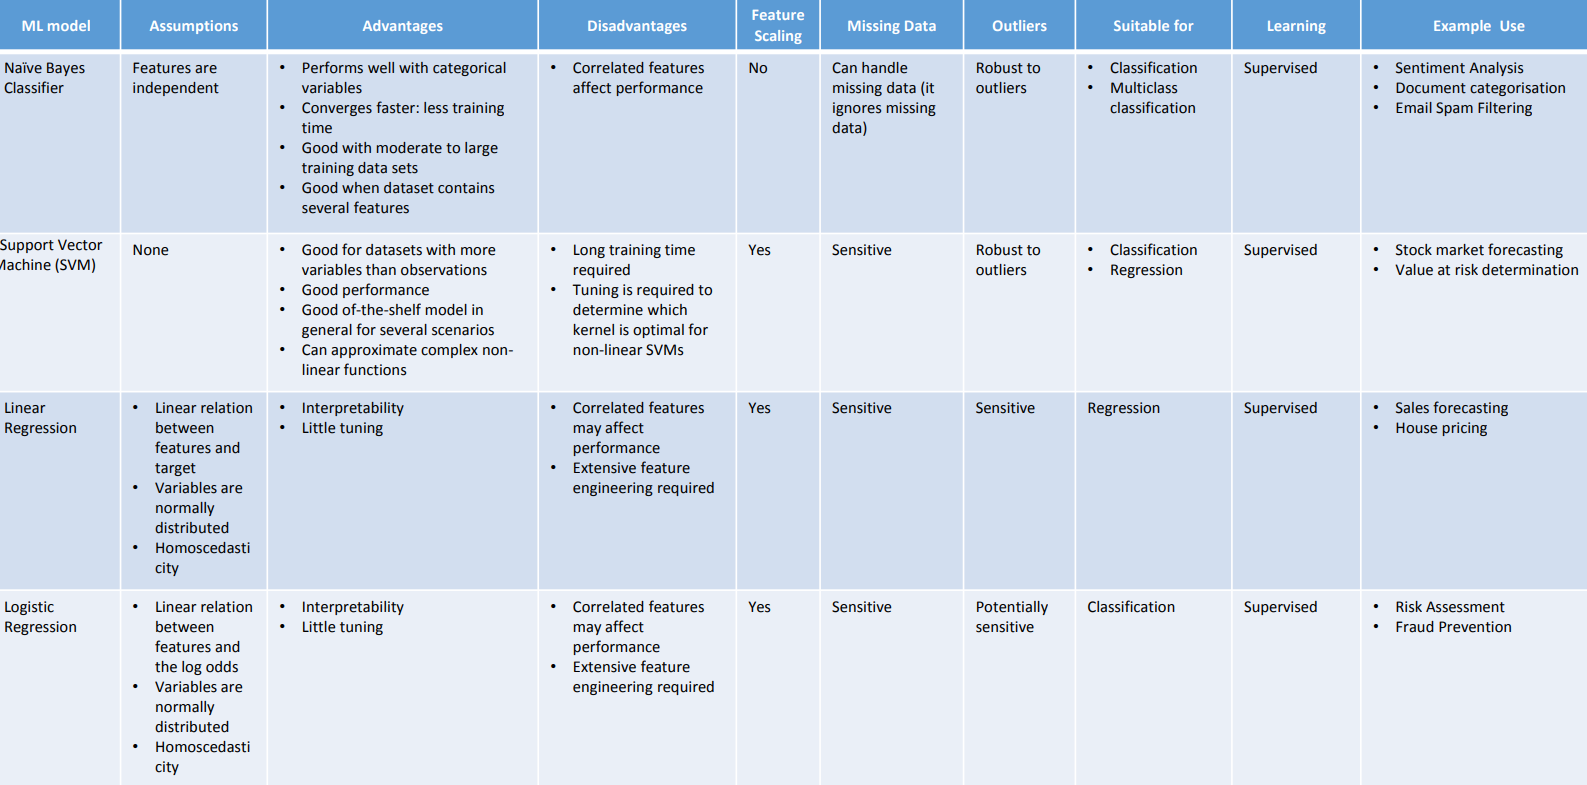

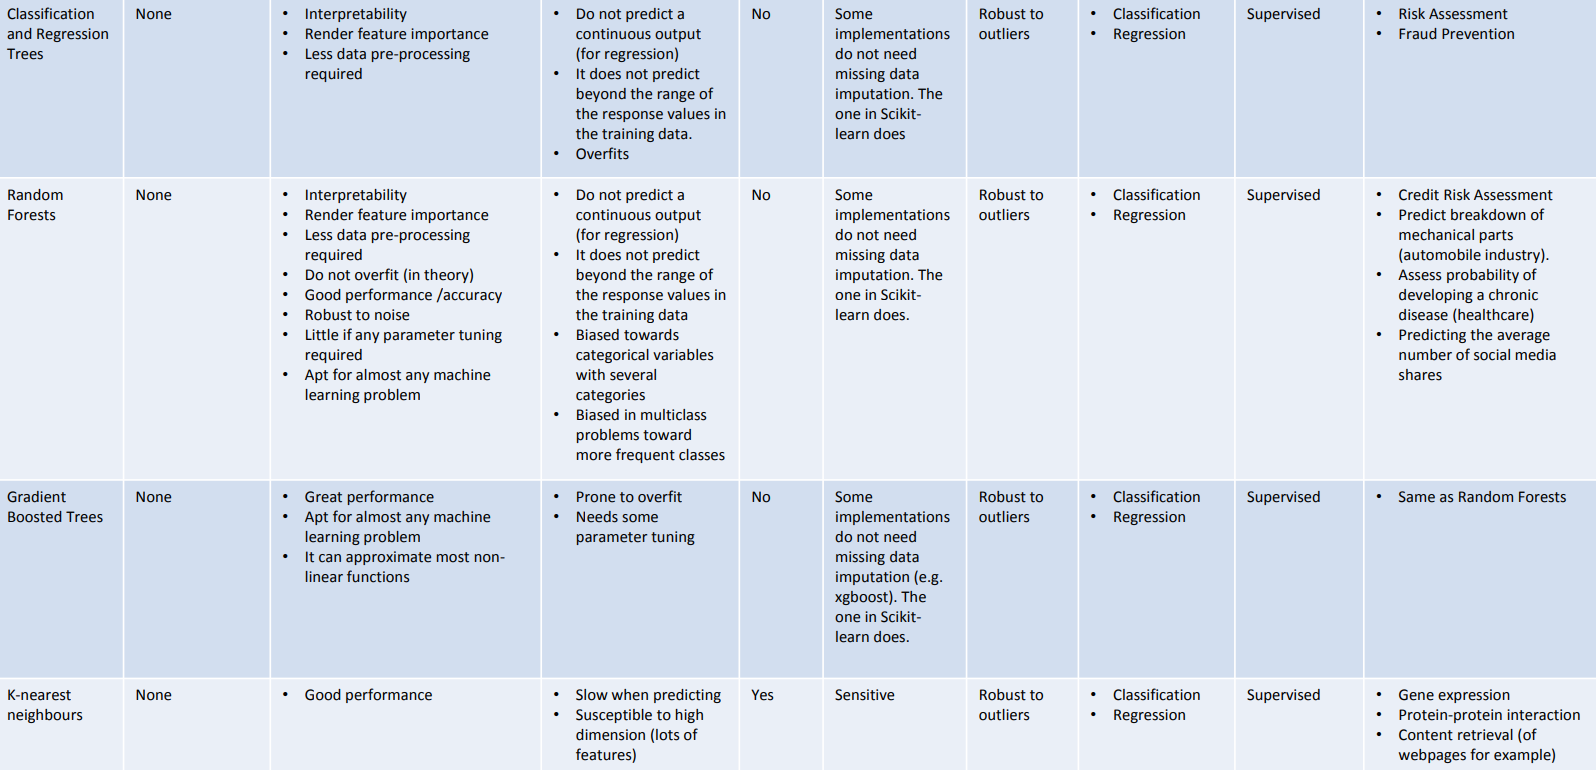

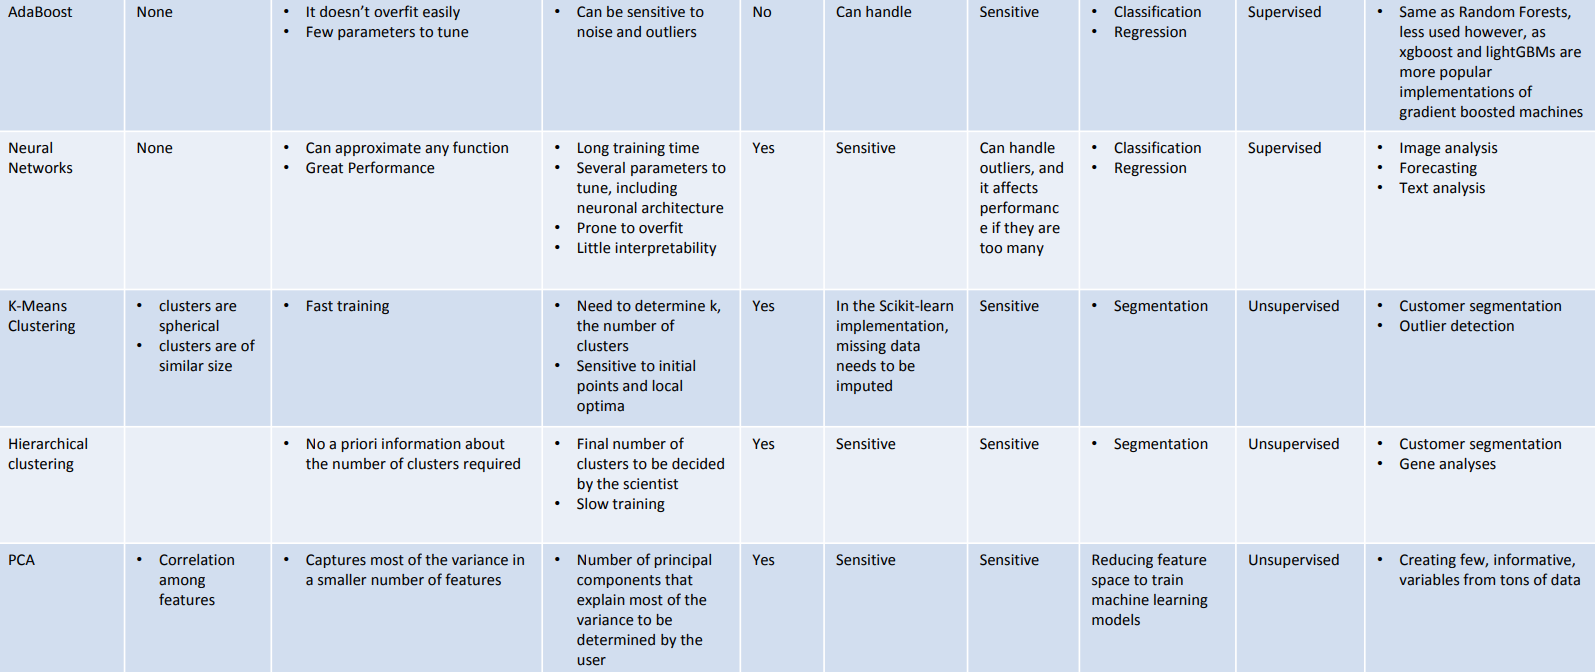

In [ ]:
# Cohen's Kappa
#  statistic that is used to measure inter-rater reliability (and also Intra-rater reliability) for qualitative (categorical) items
# https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english

In [ ]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)
# another option with separated lines
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

#### Linear Regression Model
- first split up our data into an X array that contains the features to train on, and a y array with the target variable
- We will toss out the Address column because it only has text info that the linear regression model can't use.

Best linear model:
- Linear relationship describes a relationship between the independent variables X and the target Y that is given by: Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.
- Normality means that every variable X follows a Gaussian distribution.
- Multi-colinearity refers to the correlation of one independent variable with another. Variables should not be correlated.
- Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.

Assess by:
- Linear regression can be assessed by scatter-plots and residuals plots
- Normal distribution can be assessed by Q-Q plots
- Multi-colinearity can be assessed by correlation matrices
- Homoscedasticity can be assessed by residuals plots

What can we do if the assumptions are not met?
- Mathematical transformation of the variables
- Discretisation

In [ ]:
# for the Q-Q plots
import scipy.stats as stats
# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standarize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

##### ASSESS LINEAR REGRESSION WITH SCATTER PLOT

In [ ]:
# Do for each independent variable 
sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

# The form we want it to take is below:

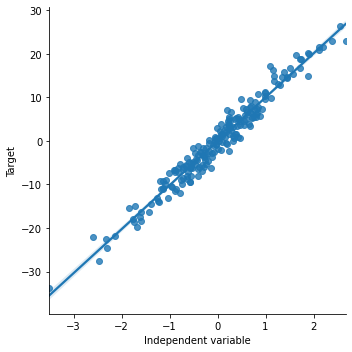

In [ ]:
# If the points are not scattered about line as above then
# apply a log transformation to the independent variable
boston['log_crim'] = np.log(boston['CRIM'])

# plot the transformed CRIM variable vs MEDV
sns.lmplot(x="log_crim", y="MEDV", data=boston, order=1)

##### ASSESS LINEAR REGRESSION WITH RESIDUAL PLOT

This is the distribution of the errors, or the residuals. The residuals refer to the difference between the predictions and the real value of the target. It is performed as follows:

1) make a linear regression model using the desired variables (X)

2) obtain the predictions 

3) determine the error (True house price - predicted house price)

4) observe the distribution of the error.

If the house price, in this case MEDV, is linearly explained by the variables we are evaluating, then the error should be random noise, and should typically follow a normal distribution centered at 0. We expect to see the error terms for each observation lying around 0.

In [ ]:
# SIMULATED DATA

# step 1: make a linear model
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(toy_df['x'].to_frame(), toy_df['y'])

# step 2: obtain the predictions
# make the predictions
pred = linreg.predict(toy_df['x'].to_frame())

# step 3: calculate the residuals
error = toy_df['y'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=toy_df['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

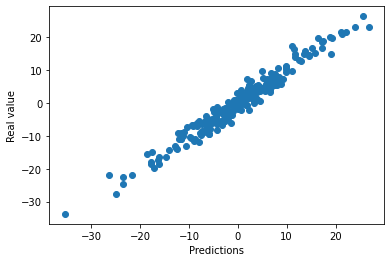

The model makes good predictions. The predictions are quite aligned with the real value of the target.

In [ ]:
# step 4: observe the distribution of the errors

# Residuals plot
# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

# we plot the error terms vs the independent variable x
# error values should be around 0 and homogeneously distributed

plt.scatter(y=error, x=toy_df['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

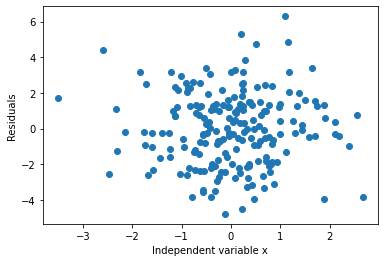

The errors are distributed around 0, as expected.

In [ ]:
# step 4: observe the distribution of the errors

# plot a histogram of the residuals
# they should follow a gaussian distribution
# centered around 0

sns.distplot(error, bins=30)
plt.xlabel('Residuals')

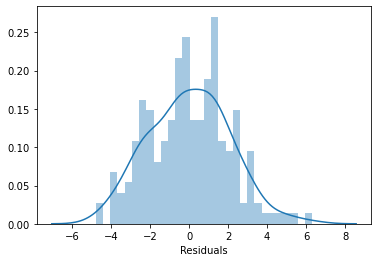

The errors adopt a Gaussian distribution and it is centered around 0. So it meets the assumptions, as expected.

Do for other variables

Below is an example of NOT being distributed around zero so would do a log transform on the independent variable.

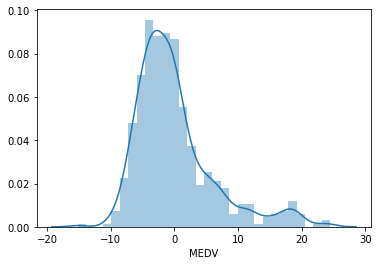

In [ ]:
# let's repeat the exercise but fitting the model to the
# log transformed LSTAT

# call the linear model from sklearn
linreg = LinearRegression()

# fit the model ***LOG TRANSFORM IS HERE
linreg.fit(np.log(boston['LSTAT']).to_frame(), boston['MEDV'])

# make the predictions
pred = linreg.predict(np.log(boston['LSTAT']).to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

##### Multicolinearity

To determine co-linearity, we evaluate the correlation of all the independent variables in the dataframe.

In [ ]:
# we calculate the correlations using pandas corr
# and we round the values to 2 decimals
correlation_matrix = boston[features].corr().round(2)

# plot the correlation matrix usng seaborn
# annot = True to print the correlation values
# inside the squares

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

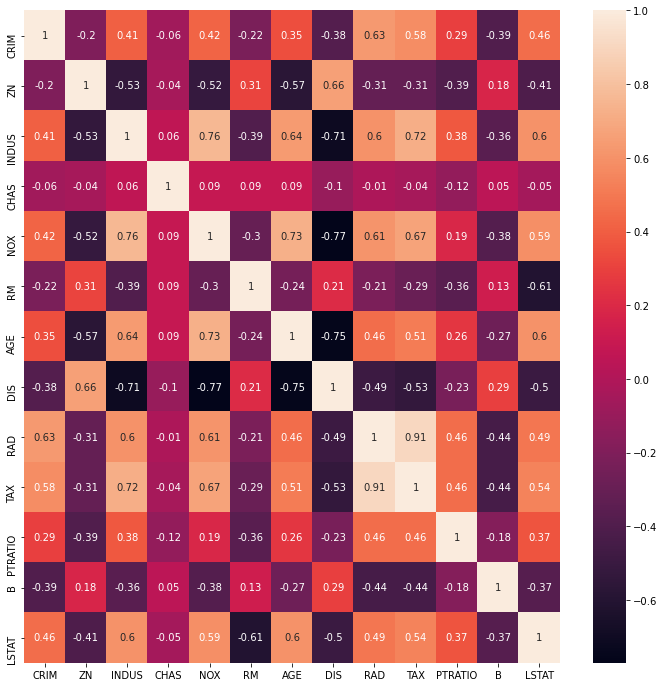

On the x and y axis of the heatmap we have the variables of the boston house dataframe. Within each square, the correlation value between those 2 variables is indicated. For example, for LSTAT vs CRIM at the bottom left of the heatmap, we see a correlation of 0.46. These 2 variables are not highly correlated.

Instead, for the variables RAD and TAX (try and find them in the plot), the correlation is 0.91. These variables are highly correlated. The same is true for the variables NOX and DIS, which show a correlation value of -0.71.

Let's see how they look in a scatter plot.

In [ ]:
# and now NOX (itric oxides concentration (parts per 10 million))
# and DIS (weighted distances to five Boston employment centres)

sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

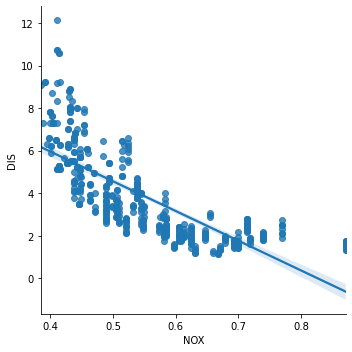

The correlation, or co-linearity between NOX and DIS, is quite obvious in the above scatter plot. So these variables are violating the assumption of no multi co-linearity.

What we would do is remove 1 of the 2 from the dataset before training the linear model.

##### Normality

We evaluate normality using histograms and Q-Q plots. I explain Q-Q plots a few cells below. 

Let's begin with histograms. If the variable is normally distributed, we should observe the typical Gaussian bell shape.

###### Histograms

Do for each variable of interest

In [ ]:
# histogram of the variable LSTAT
# (% lower status of the population)

sns.distplot(boston['LSTAT'], bins=30)

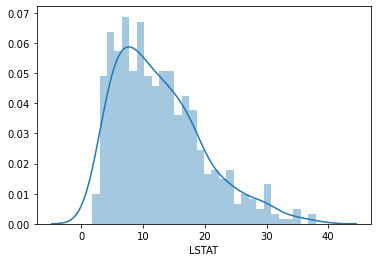

In [ ]:
# LSTAT is skewed. Let's see if a transformation fixes this.

# histogram of the log-transformed LSTAT for comparison
sns.distplot(np.log(boston['LSTAT']), bins=30)

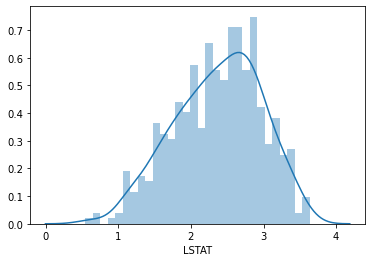

The distribution is less skewed, but not totally normal either. We could go ahead and try other transformations. I will say more on this in a dedicated section later in the course.

##### Q-Q plots

In a Q-Q plot, the quantiles of the variable are plotted on the vertical axis (y), and the quantiles of a specified probability distribution (Gaussian distribution) are indicated on the horizontal axis (x). The plot consists of a series of points that show the relationship between the quantiles of the real data and the quantiles of the specified probability distribution. If the values of a variable perfectly match the specified probability distribution (i.e., the normal distribution), the points on the graph will form a 45 degree line. See below.

In [ ]:
# let's do the same for RM
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.show()

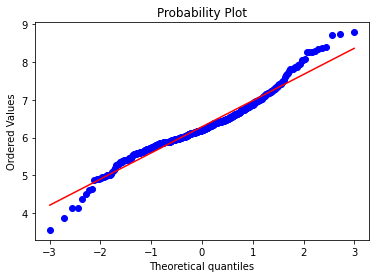

Most of the points adjust to the 45 degree line. However, the values at both ends of the distribution deviate from the line. This indicates that the distribution of RM is not perfectly Gaussian.

In [ ]:
# IF NECESSARY, do a log transformation to see if improves the normality
# and now for the log transformed LSTAT
stats.probplot(np.log(boston['LSTAT']), dist="norm", plot=plt)
plt.show()

##### Homocedasticity

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs each one of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

- Residuals plot
- Levene’s test
- Barlett’s test
- Goldfeld-Quandt Test

But those escape the scope of this course. So for this demo I will focus on residual plot analysis.

In [ ]:
# to train and evaluate the model, let's first split into
# train and test data, using the variables of choice:
# LSTAT, RM and CRIM

# let's separate into training and testing set
# using the sklearn function below

X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# let's scale the features

scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
# model build using the natural distributions

# call the model
linreg = LinearRegression()

# train the model
linreg.fit(scaler.transform(X_train), y_train)

# make predictions on the train set and calculate
# the mean squared error
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# make predictions on the test set and calculate
# the mean squared error
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

In [ ]:
# let's plot the residuals vs RM (do for LM as well)
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

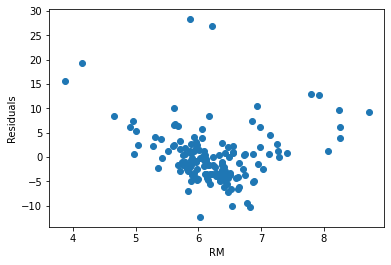

For this variable, the residuals do not seem to be homogeneously distributed across the values of RM. In fact, low and high values of RM show higher error terms.

The distribution of the residuals is fairly normal, but not quite, with more high values than expected towards the right end of the distribution.

In [ ]:
# in this cell, I want to introduce the use of yellobricks
# a library for visualisation of machine learning model outcomes

# if you don't have yellowbricks installed, comment out
# this cell to avoid errors while running the notebook

# yellowbricks allows you to visualise the residuals of the
# models after fitting a linear regression

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

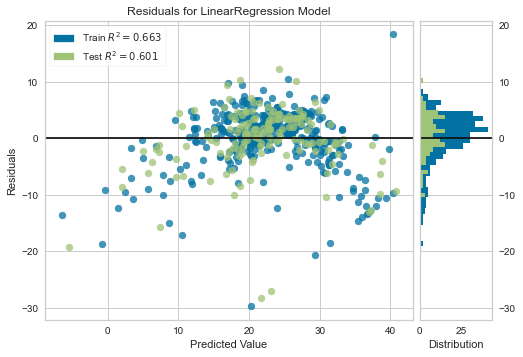

We see from the plot that the residuals are not homogeneously distributed across the predicted value and are not centered around zero either.

Let's see if transformation of the variables CRIM and LSTAT helps improve the fit and the homoscedasticity.

In [ ]:
# log transform the variables THEN REDO CODE FROM ABOVE
boston['LSTAT'] = np.log(boston['LSTAT'])
boston['CRIM'] = np.log(boston['CRIM'])
boston['RM'] = np.log(boston['RM'])

In [ ]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

# train test split
from sklearn.model_selection import train_test_split
# random state is set so reproducible 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# train the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

# evaluate the model
# print the intercept
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

# predictions from model
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
# residual histogram
sns.distplot((y_test-predictions),bins=50);

# regression evaluation metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#### Logistic Regression

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

# training and predicting
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

# evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

#### K Nearest Neighbors with Python

In [ ]:
# Standardize the Variables
# Because the KNN classifier predicts the class of a given test observation by identifying the observations that are 
# nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect 
# on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)
# Using KNN
# Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Choose a K Value
# Use the elbow method to pick a good K Value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate'

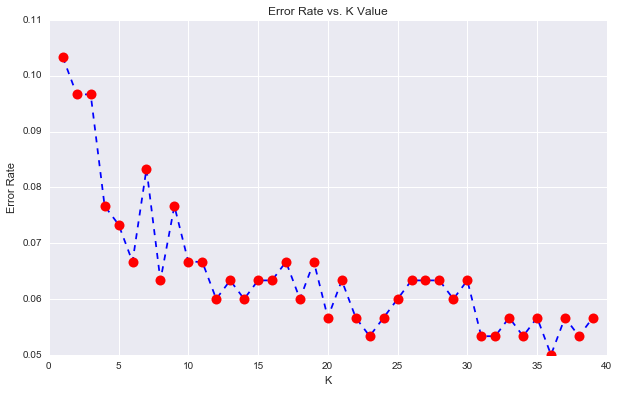

In [ ]:
# Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 
# Let's retrain the model with that and check the classification report
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

#### Decision Trees and Random Forests in Python

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# Prediction and Evaluation 
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

# Tree Visualization
# Scikit learn actually has some built-in visualization capabilities for decision trees, 
# you won't use this often and it requires you to install the pydot library, 
# but here is an example of what it looks like and the code to execute this
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  



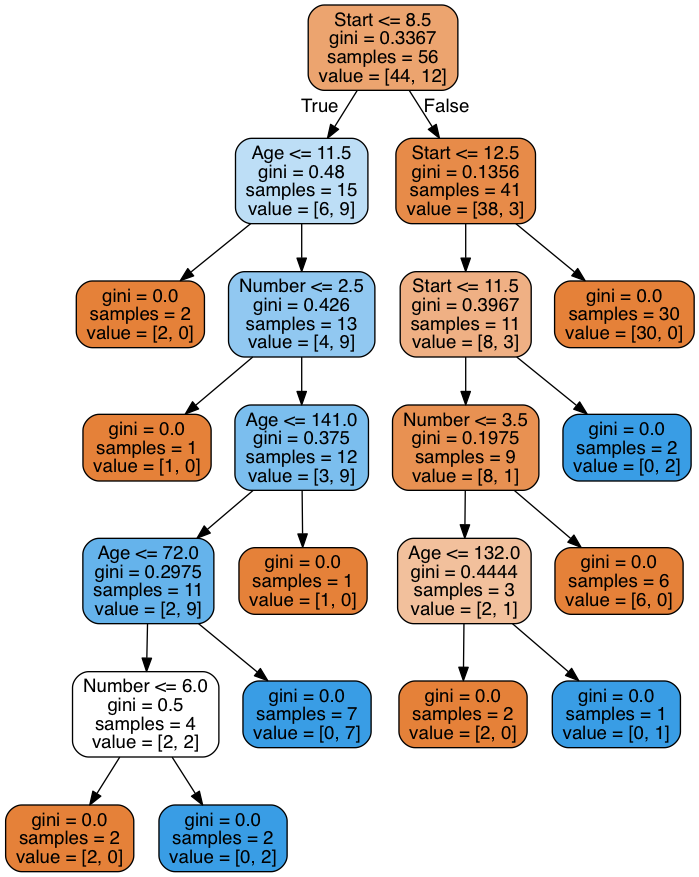

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

##### Support Vector Machines

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

# Train the Support Vector Classifier
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

# Predictions and Evaluations
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

# Gridsearch
# trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this 
# functionality built in with GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, 
# to find the best parameter combination. Once it has the best combination, 
# it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.
# May take awhile!
grid.fit(X_train,y_train)
# inspect the best parameters
grid.best_params_
grid.best_estimator_
# re-run predictions on this grid object just like you would with a normal model
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

##### K Means Clustering
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])
kmeans.cluster_centers_
kmeans.labels_

# chart original vs k means
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

##### Principal Component Analysis
Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm
Remember that PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

# Now we can transform this data to its first 2 principal components.
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

# We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

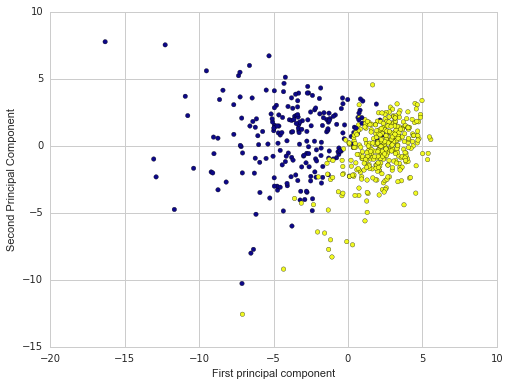

In [ ]:
# Unfortunately, with this great power of dimensionality reduction, 
# comes the cost of being able to easily understand what these components represent.

# In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. 
# we can visualize this relationship with a heatmap:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

# This heatmap and the color bar basically represent the correlation between the various feature 
# and the principal component itself.

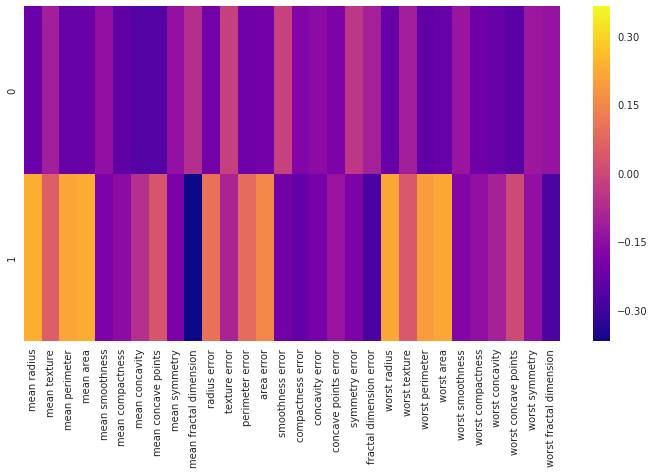

##### Segmented Regression
- also known as piecewise regression or broken-stick regression 
- the independent variable is partitioned into intervals and a separate line segment is fit to each interval
- Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions.
- the relations in the intervals are obtained by linear regression
- my comments: instead of one straight line, there are two or more straight lines the have different slopes & intercepts

##### NLP (Natural Language Processing)

In [ ]:
import nltk # Imports the library





# User Defined Functions
- first line put def then the name of the function (square in this case) then () with parameter (value in this case) in the brackets:
- second line must be indented then variable name is assigned to the function that want to perform on "value" parameter
- third line will return the value from function
- so when call function, pass argument 4 into function with square(4) and result is 16
- def square(value):
-     new_value = value ** 2
-     return new_value
-

# General Notes
- place where want later

In [ ]:
num = 12
name = 'Sam'
# use either one
print('My number is: {one}, and my name is: {two}'.format(one=num,two=name))
print('My number is: {}, and my name is: {}'.format(num,name))

# lists
# in square brackets
nest = [1,2,3,[4,5,['target']]]
nest[3][2][0]
# result is 'target'

# dictionary
d = {'key1':'item1','key2':'item2'}

# tuple
t = (1,2,3)

# if/ else statements
if 1 == 2:
    print('first')
elif 3 == 3:
    print('middle')
else:
    print('Last')
    
# for loop
for jelly in seq:
    print(jelly+jelly)
    
# while loop
i = 1
while i < 5:
    print('i is: {}'.format(i))
    i = i+1
    
# lambda
def times2(var):
    return var*2
# OR
lambda var: var*2

# map
list(map(lambda var: var*2,seq))

# remove columns
df.drop('new',axis=1)

# remove rows
df.drop('E',axis=0)

# select row via label
df.loc['A']

# select row via index
df.iloc[2]

# select specific value
df.loc['B','Y']

# Reset to default 0,1...n index
df.reset_index()

# set index
df.set_index('States')

#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

# The key to using a Series is understanding its index. 
# Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])  
ser1['USA']
# answer is 1

# indexing lists
# get first element: my_list[0]
# get all elements from 1 onwards: my_list[1:]

for col in train.columns: 
    print(col) 